In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [3]:
# 1. 데이터 로드
URL = "/content/drive/MyDrive/WORK/DSS 머신러닝2/" # 데이터 위치 설정
df = pd.read_csv(URL+"data/LOC.csv") # 시각화를 위해 2차원 데이터 사용

In [4]:
df.head(5)

X1        X2  outlier
0  2.487304  1.816473        1
1  1.841548  1.678109        1
2  2.259622  1.309538        1
3  2.523444  1.771638        1
4  2.095712  1.925189        1

In [5]:
data_X = df.drop(["outlier"], axis = 1)
data_Y = df['outlier']

In [7]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.pyplot import figure

# 모델 생성
# n_neighbors = K
# contamination = 0.? , Outlier의 비율을설정할 수 있음 (경험적으로 불량의 비율을 알고 있을때 설정)
clf = LocalOutlierFactor(n_neighbors=10,contamination = 0.1)
y_pred = clf.fit_predict(data_X) #1,-1로 나온다.
X_scores = clf.negative_outlier_factor_ # loc score

# 에러의 수를 확인하는 방법
n_errors = (y_pred != data_Y).sum()

print("LOC score 확인하기")
print(X_scores[:10])
print(" ")
print("에러의 수")
print(n_errors)

LOC score 확인하기
[-1.21950542 -1.07979294 -1.39337813 -1.31770414 -0.96096728 -1.38285875
 -1.01669187 -1.06764366 -1.0087065  -0.98669274]
 
에러의 수
10


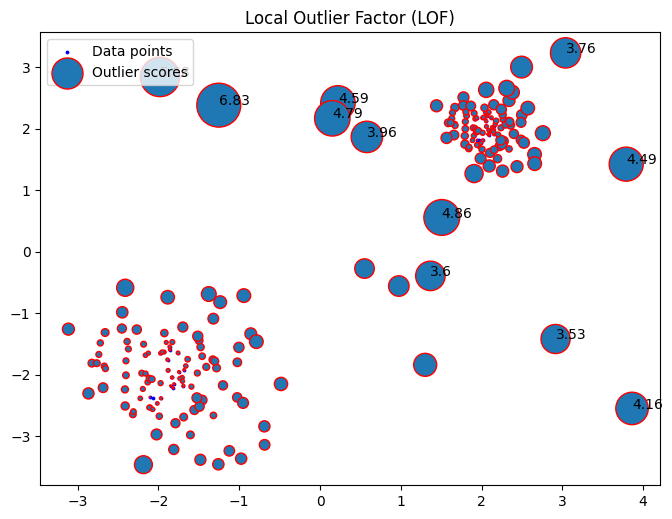

In [14]:
# 시각화해서 보기 (고차원 데이터는 시각화가 어려움, tsne 등으로 축소해서 봐야함)
# figure 설정 방법
# figsize = (8,6)
# dpi = 해상도 - 발표 자료 등

figure(figsize=(8, 6), dpi=100)

data_X = np.array(data_X)
plt.title("Local Outlier Factor (LOF)")
# color = 점의 색
# s = 점의 size
# label 
plt.scatter(data_X[:, 0], data_X[:, 1], color='b', s=3., label='Data points')

# minmax scaling으로 이상치를 표현하였음
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# scatter plot을 활용한 시각화
plt.scatter(data_X[:, 0], data_X[:, 1], s=1000 * radius, edgecolors='r', label='Outlier scores') 
n=np.copy(X_scores)
n[n>-2.7]=np.nan
n=-np.round(n,2)

# Annotate
for i, txt in enumerate(n):
    if np.isnan(txt):continue # 
    plt.annotate(txt, (data_X[i,0], data_X[i,1]))
legend = plt.legend(loc='upper left')
plt.show()

In [ ]:
#